# 音声信号処理(12/11)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#関数
def myplot(x,y,xlabel='',ylabel=''):
    plt.figure(figsize=(15,4))
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.plot(x,y)
    
def myplot_complex(x,y):
    plt.figure(figsize=(15,4))
    plt.subplot(2,1,1)
    plt.xlabel("time")
    plt.ylabel("Amplitude")
    plt.plot(x,y)
    
    plt.plot(x,abs(y))
    
    plt.subplot(2,1,2)
    plt.ylabel("phase")
    plt.plot(x,np.angle(y))

def analystic_signal(t,x,fs):
    freq = np.linspace(0, fs-fs/len(t),len(t))
    X=np.fft.fft(x)
    S = np.zeros(len(X),dtype=np.complex)
    S[:len(X)//2] = X[:len(X)//2]
    s = np.fft.ifft(S)
    return s

def analystic_signal_useHilbert(t,x,fs):
    freq = np.linspace(0, fs-fs/len(t),len(t))
    H = np.zeros(len(freq),dtype=np.complex)
    H[:len(freq)//2] = -1j
    H[len(freq)//2:] = 1j
    sr=x/2
    Sr = np.fft.fft(sr)
    Si = Sr * H
    si = np.fft.ifft(Si)
    s = sr + si*1j
    return s,sr,si

## sin(200πt)の音声波形と解析信号表表現

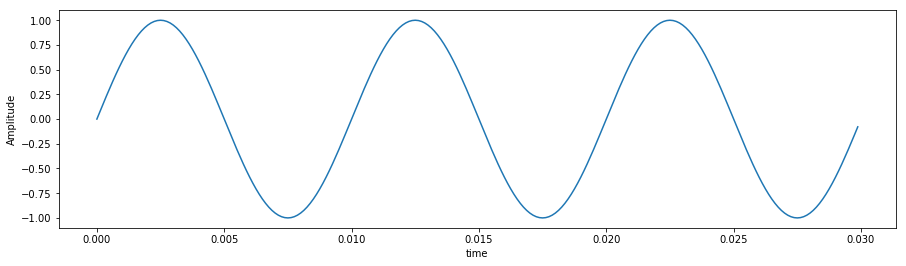

In [3]:
#100Hz
fs=8000
t = np.arange(0,0.03,1/fs)
freq = np.linspace(0, fs-fs/len(t),len(t))
x = np.sin(2*np.pi*100*t)
myplot(t,x,"time","Amplitude")

### analystic signal(200Hz sin wave)

/usr/local/src/pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


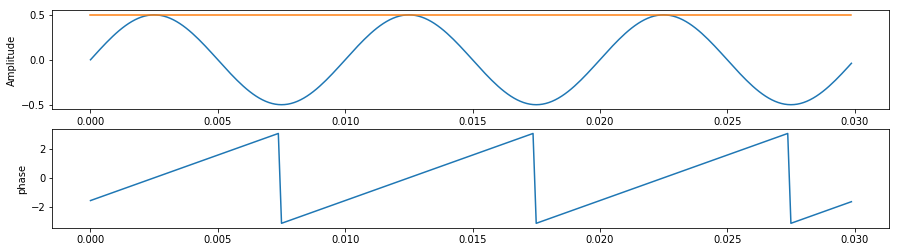

In [4]:
s = analystic_signal(t,x,fs)
myplot_complex(t,s)

### analystic signal use Hilbert(200Hz sin wave)

/usr/local/src/pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


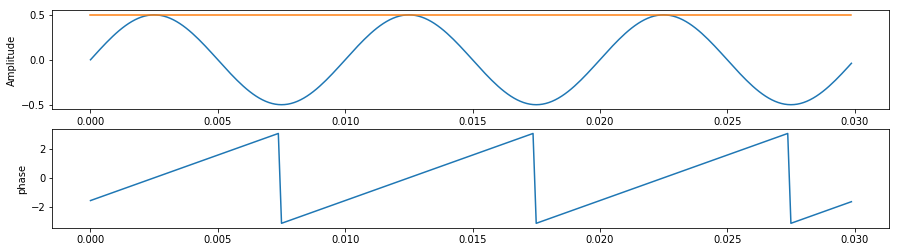

In [5]:
s,sr,si = analystic_signal_useHilbert(t,x,fs)
myplot_complex(t,s)

/usr/local/src/pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


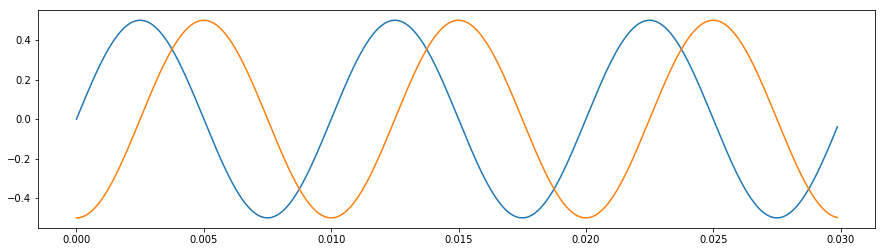

In [6]:
plt.figure(figsize=(15,4))
plt.plot(t,sr)
plt.plot(t,si)

## sin(200πt)*sin(4000πt)の音声波形と解析信号表表現

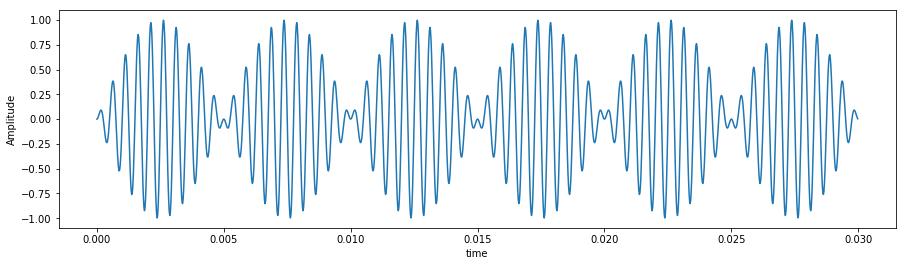

In [7]:
fs=48000
t = np.arange(0,0.03,1/fs)
freq = np.linspace(0, fs-fs/len(t),len(t))
x = np.sin(2*np.pi*100*t)*np.sin(2*np.pi*2000*t)
myplot(t,x,"time","Amplitude")

### analystic signal(sin200Hz * sin4000Hz)

/usr/local/src/pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


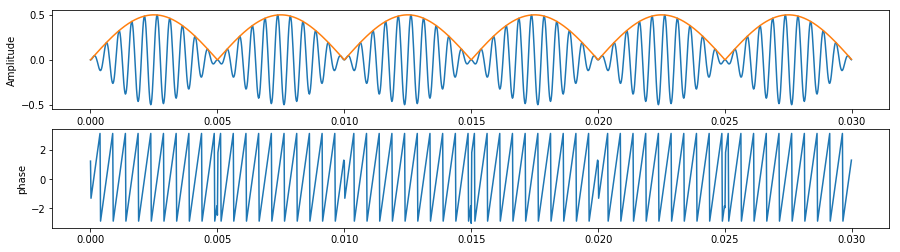

In [8]:
s = analystic_signal(t,x,fs)
myplot_complex(t,s)

### analystic signal use Hilbert(sin200Hz * sin4000Hz)

/usr/local/src/pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


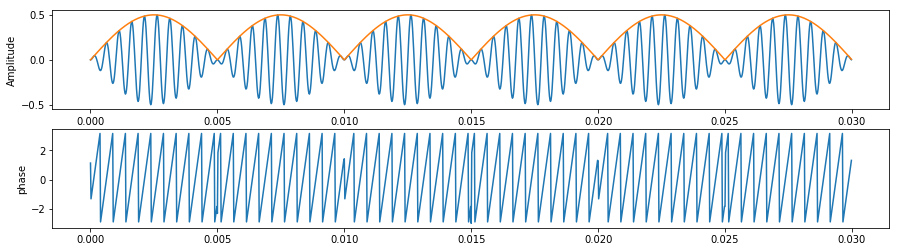

In [9]:
s,sr,si = analystic_signal_useHilbert(t,x,fs)
myplot_complex(t,s)

/usr/local/src/pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


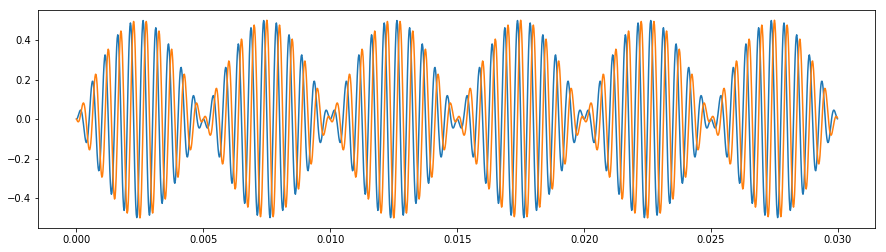

In [10]:
plt.figure(figsize=(15,4))
plt.plot(t,sr)
plt.plot(t,si)

### 位相に関する確認(2000Hz sin wave)

/usr/local/src/pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


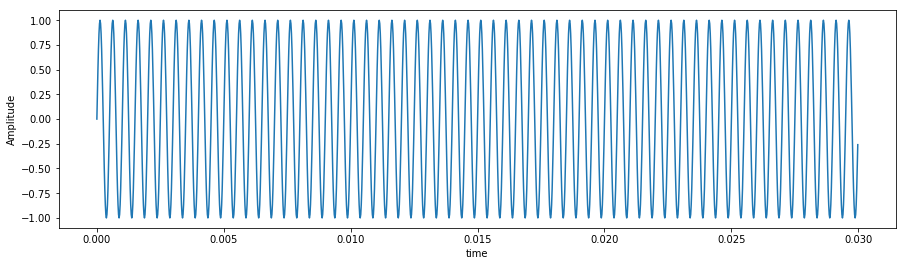

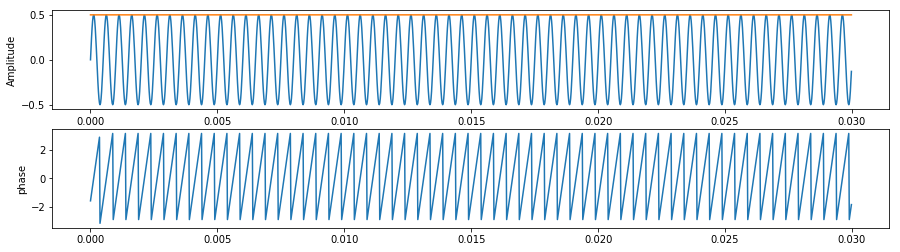

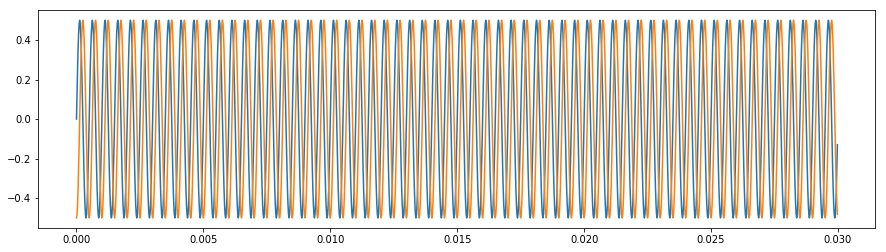

In [11]:
fs=48000
t = np.arange(0,0.03,1/fs)
freq = np.linspace(0, fs-fs/len(t),len(t))
x = np.sin(2*np.pi*2000*t)
myplot(t,x,"time","Amplitude")
s,sr,si = analystic_signal_useHilbert(t,x,fs)
myplot_complex(t,s)
plt.figure(figsize=(15,4))
plt.plot(t,sr)
plt.plot(t,si)